# data stats

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
import numpy as np



In [4]:
ls tabs/

BLEU-step124k_beam4_lp0.6_ens10.txt
brown-corpus.term-freqs.tsv
dataset-selection.min.tsv
dataset-selection.tsv
train.good.dedup.notest.ascitgt.tok.stats.tsv


In [82]:
df = pd.read_table('tabs/brown-corpus.term-freqs.tsv', names=['Type', 'Frequency'])
df = df.dropna()
df

,Type,Frequency
0,the,69971
1,",",58334
2,.,49346
3,of,36412
4,and,28853
...,...,...
49707,$.12,1
49708,$.105,1
49709,$.10-a-minute,1
49710,$.09,1


saving to charts/brown-corpus-zipf.pdf


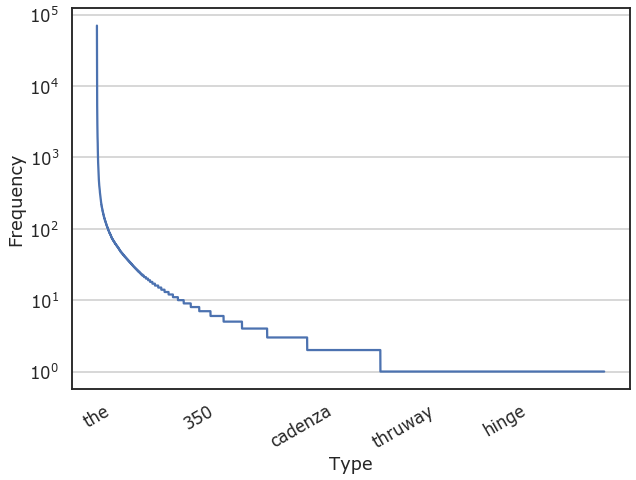

In [149]:
sns.set(font="Verdana", style='white',font_scale=1.5)
sns.set_context("talk")
args=dict(figsize=(10, 7), logy=True, legend=False, ylabel='Frequency', rot=30)
ax = df.plot(x='Type', y='Frequency', **args)
ax.yaxis.grid(which='major')

if True:
    save = 'charts/brown-corpus-zipf.pdf'
    print(f'saving to {save}')
    plt.savefig(save, bbox_inches='tight')
    

saving to charts/brown-corpus-zipf-top50.pdf


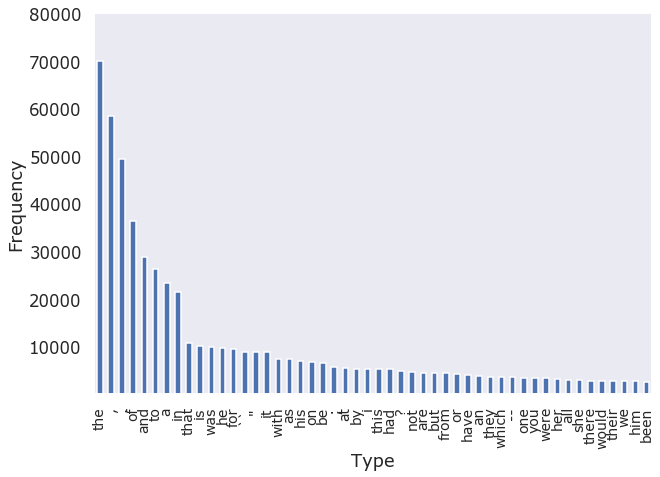

In [108]:
sns.set(font="Verdana", style='dark',font_scale=2)
sns.set_context('talk')
args=dict(figsize=(10, 7), logy=False, legend=False, ylabel='Frequency', rot=90, ylim=(10**0,  8 * 10**4))
df[:50].plot(x='Type', y='Frequency', kind='bar', **args)
#plt.yaxis.grid(which='major')
plt.xticks(fontsize=14)
if True:
    save = 'charts/brown-corpus-zipf-top50.pdf'
    print(f'saving to {save}')
    plt.savefig(save, bbox_inches='tight')

In [87]:
total = df['Frequency'].sum()
df['Probability'] = df['Frequency'] / total
# https://en.wikipedia.org/wiki/Information_content
df['InformationContent'] = -1 * np.log2(df['Probability']) 
df

,Type,Frequency,Probability,InformationContent
0,the,69971,6.027047e-02,4.052405
1,",",58334,5.024678e-02,4.314825
2,.,49346,4.250485e-02,4.556229
3,of,36412,3.136397e-02,4.994748
4,and,28853,2.485292e-02,5.330441
...,...,...,...,...
49707,$.12,1,8.613635e-07,20.146874
49708,$.105,1,8.613635e-07,20.146874
49709,$.10-a-minute,1,8.613635e-07,20.146874
49710,$.09,1,8.613635e-07,20.146874


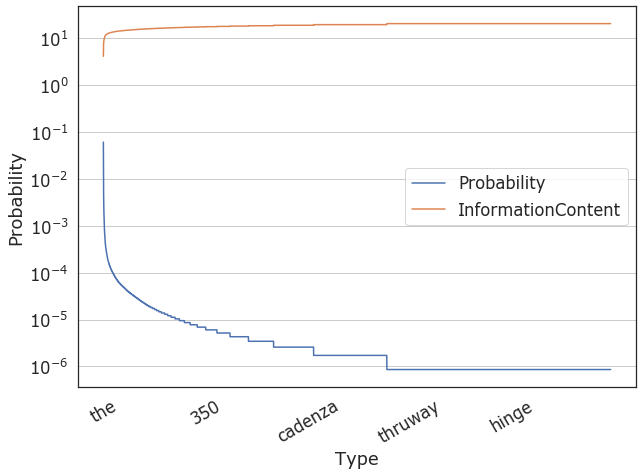

In [88]:
sns.set(font="Verdana", style='white',font_scale=1.5)
args=dict(figsize=(10, 7), logy=True, ylabel='Probability', rot=30)
ax = df.plot(x='Type', y=['Probability', 'InformationContent'], **args)
ax.yaxis.grid(which='major')

saving to charts/brown-corpus-shannons.pdf


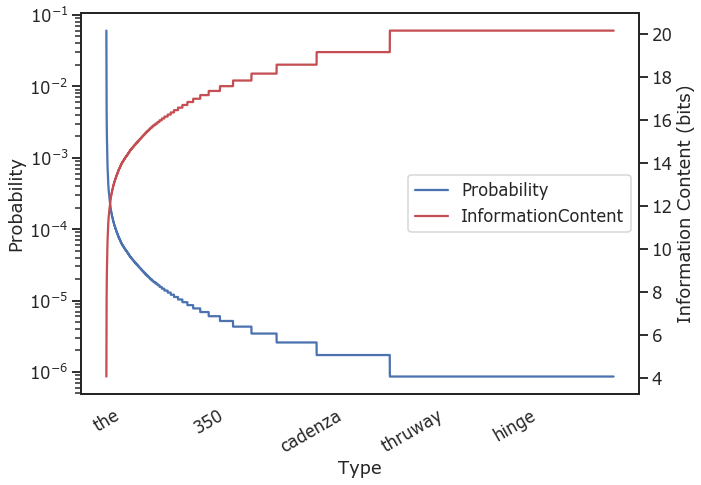

In [148]:
sns.set(font="Verdana", style='white',font_scale=1.5)
sns.set_context('talk')
args = dict(figsize=(10, 7), logy=True, ylabel='Probability', rot=30, legend=False)
ax1 = df.plot(x='Type', y=['Probability'], **args)

#ax1.legend(loc='center right')
#ax.yaxis.grid(which='major')
ax2 = df['InformationContent'].plot(secondary_y=True, color='r', rot=30, legend=False)
ax2.set_ylabel('Information Content (bits)')

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [line.get_label() for line in lines], loc='center right')

if True:
    save = 'charts/brown-corpus-shannons.pdf'
    print(f'saving to {save}')
    plt.savefig(save, bbox_inches='tight')

In [ ]:
sns.set(font="Verdana", style='white',font_scale=1.5)
sns.set_context('talk')
args = dict(figsize=(10, 7), logy=True, ylabel='Probability', rot=30, legend=False)
ax1 = df.plot(x='Type', y=['Probability'], **args)

#ax1.legend(loc='center right')
#ax.yaxis.grid(which='major')
ax2 = df['InformationContent'].plot(secondary_y=True, color='r', rot=30, legend=False)
ax2.set_ylabel('Information Content (bits)')

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [line.get_label() for line in lines], loc='center right')

if True:
    save = 'charts/brown-corpus-shannons.pdf'
    print(f'saving to {save}')
    plt.savefig(save, bbox_inches='tight')

In [124]:
ax1.legend

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7fc0195a7350>>

In [83]:
df[df.isnull().any(axis=1)]

,Type,Frequency


In [74]:
df

,Type,Frequency,Probability,InformationContent
0,the,69971,5.859330e-02,4.093121
1,",",58334,4.884854e-02,4.355541
2,.,49346,4.132204e-02,4.596945
3,of,36412,3.049119e-02,5.035464
4,NaN,32012,2.680666e-02,5.221265
...,...,...,...,...
50238,$.105,1,8.373940e-07,20.187590
50239,$.10-a-minute,1,8.373940e-07,20.187590
50240,$.09,1,8.373940e-07,20.187590
50241,$.076,1,8.373940e-07,20.187590


---- 

In [16]:
matplotlib.font_manager._rebuild()

In [20]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font} {fontu}</p>".format(font=fontname, fontu=fontname.upper())

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))